In [2]:
#importing packages needed
import sqlite3 as sq
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Because we will be plotting
%matplotlib inline

In [6]:
db = sq.connect('Final_Project.db')
cursor = db.cursor()

In [7]:
#DROP TABLE
db = sq.connect('Final_Project.db')
cursor = db.cursor()

cursor.execute("DROP TABLE boran")

db.commit()

In [8]:
#Schema for table: boran
query = """
CREATE TABLE IF NOT EXISTS
boran (
    patient_id INTEGER UNIQUE NOT NULL,
    blood_pressure REAL NOT NULL,
    exercise REAL NOT NULL,
    weight REAL NOT NULL,
    glucose REAL NOT NULL,
    bmi REAL NOT NULL,
    planet_id INTEGER,
    FOREIGN KEY(patient_id) REFERENCES deidentify_list_cross_ref(patient_id) ON DELETE CASCADE ON UPDATE CASCADE

)
"""
db.commit()
cursor.execute(query)

In [9]:
#Schema for table: radan
query = """
CREATE TABLE IF NOT EXISTS
radan (
    patient_id INTEGER UNIQUE NOT NULL,
    blood_pressure REAL NOT NULL,
    exercise REAL NOT NULL,
    weight REAL NOT NULL,
    glucose REAL NOT NULL,
    bmi REAL NOT NULL,
    planet_id INTEGER,
    FOREIGN KEY(patient_id) REFERENCES deidentify_list_cross_ref(patient_id) ON DELETE CASCADE ON UPDATE CASCADE

)
"""
db.commit()
cursor.execute(query)

In [10]:
#Schema for table: deidentify_list_cross_ref
query = """
CREATE TABLE IF NOT EXISTS
deidentify_list_cross_ref (
    patient_id INTEGER NOT NULL,
    age REAL NOT NULL,
    PRIMARY KEY(patient_id) 
)
"""
db.commit()
cursor.execute(query)

In [11]:
#import .csv file (boran.csv)

with open('boran.csv', 'r') as file:
    boran = csv.reader(file)
    records = [line for line in boran]
    print (records[1:])
    
#insert the data

cursor.executemany('INSERT INTO boran VALUES(?, ?, ?, ?, ?, ?, ?)', records[1:])

db.commit()

[['83944', '199.3786754272559', '143.2052394127308', '148.0363096589752', '125.2309595029977', '1.045335998748602', '1'], ['41989', '191.8531077765801', '102.5442949528522', '141.5887765213941', '119.8078897247692', '0.9888492943037684', '1'], ['94365', '207.2266056086006', '36.44648205029367', '157.4992910809086', '131.7500887097457', '1.09559924203521', '1'], ['93464', '203.4425081424164', '91.47601189936653', '152.8712061235762', '128.5861359293158', '1.071569290992198', '1'], ['57985', '194.2367744398017', '9.071700640962508', '145.5840706287164', '122.1414633727435', '1.000578523678859', '1'], ['16465', '208.5735015259991', '27.68127539647105', '158.9478567151441', '132.8135865552408', '1.104779426736802', '1'], ['26813', '183.5184100926074', '32.49557635765999', '134.9074255742924', '113.9466070068749', '0.9248397382758919', '1'], ['80055', '180.5131311696182', '94.34536417949276', '130.8986208819831', '111.3287589096565', '0.9068069449058118', '1'], ['12855', '176.5465913842933'

In [12]:
#import .csv file (radan.csv)

with open('radan.csv', 'r') as file:
    radan = csv.reader(file)
    records = [line for line in radan]
    print (records[1:])
    
#insert the data

cursor.executemany('INSERT INTO radan VALUES(?, ?, ?, ?, ?, ?, ?)', records[1:])

db.commit()

[['59477', '100.8503627383157', '166.2640312909193', '74.04046889881187', '73.50954656701538', '0.9541490700637366', '2'], ['33906', '103.9728732324547', '27.49981161067871', '83.31118233206458', '79.26910010956163', '1.006749089173546', '2'], ['15997', '105.2613249728564', '69.05487790417085', '83.56958587135468', '80.1495308613228', '1.032714839043871', '2'], ['39588', '100.9023859480981', '47.17046772388465', '78.41053415003124', '75.37371108750625', '0.9499893485968695', '2'], ['8499', '104.6353669752499', '75.52558886327326', '82.48170309067204', '79.31814990414159', '1.021249752353679', '2'], ['49144', '104.8333307222352', '22.27551883856579', '84.67411439019867', '80.35636148461062', '1.022667569989208', '2'], ['95063', '104.9951294578826', '11.55089947542455', '85.28207537220875', '80.70831671525943', '1.025240726356536', '2'], ['16876', '106.5904487462266', '61.84107534524813', '85.64396708999513', '81.81603105179715', '1.057340570004579', '2'], ['42695', '104.4809123013894', 

IntegrityError: UNIQUE constraint failed: radan.patient_id

In [13]:
#import .csv file (deidentify_list_cross_ref.csv)

with open('deidentify_list_cross_ref.csv', 'r') as file:
    deidentify_list_cross_ref = csv.reader(file)
    records = [line for line in deidentify_list_cross_ref]
    print (records[1:])
    
#insert the data

cursor.executemany('INSERT INTO deidentify_list_cross_ref VALUES(?, ?)', records[1:])

db.commit()

[['41989', '76.95746159793327'], ['52846', '80.07649474441595'], ['15997', '86.50820751374538'], ['8248', '74.24296476638824'], ['83944', '86.05542741715031'], ['42695', '78.05831280779482'], ['8495', '79.98288192408594'], ['89103', '75.93745799908589'], ['88346', '80.37119165380525'], ['92701', '59.48152054657916'], ['89304', '80.41722080438393'], ['52176', '81.04762176769739'], ['14617', '89.36382791296147'], ['8499', '85.80957740671172'], ['13650', '84.93243246478934'], ['75595', '76.53362593568605'], ['15337', '94.23294060813099'], ['16876', '88.65254088800572'], ['59275', '74.45000089652393'], ['40119', '83.28508436593647'], ['5502', '78.42582782260943'], ['37846', '78.77330546057742'], ['84851', '92.3174146095638'], ['94365', '85.00584953109663'], ['27746', '80.96737043245494'], ['47753', '83.68890192121138'], ['22027', '69.11082101950613'], ['49144', '80.84481411471556'], ['13711', '60.22256293137705'], ['59477', '86.81218337847068'], ['48148', '74.40147341790889'], ['33906', '7

IntegrityError: UNIQUE constraint failed: deidentify_list_cross_ref.patient_id

In [14]:
#checking UNIQUE contraints by updating with duplicate data
db = sq.connect('Final_Project.db')
cursor = db.cursor()

cursor.execute("INSERT INTO deidentify_list_cross_ref VALUES(41989, 76.9574616)")

db.commit()
db.close()

OperationalError: database is locked

In [ ]:
#checking UNIQUE contraints by updating with duplicate data
db = sq.connect('Final_Project.db')
cursor = db.cursor()

cursor.execute("INSERT INTO boran VALUES(83944, 199.3786754, 143.2052394, 148.0363097, 125.2309595, 1.045335999, 1)")

db.commit()
db.close()

In [ ]:
#checking UNIQUE contraints by updating with duplicate data
db = sq.connect('Final_Project.db')
cursor = db.cursor()

cursor.execute("INSERT INTO radan VALUES(59477, 100.8503627, 166.2640313, 74.0404689, 73.50954657, 0.95414907, 2)")

db.commit()
db.close()

In [15]:
#DO NOT RUN, ASK IN CLASS

#checking contraints by updating with data with NULL value
db = sq.connect('Final_Project.db')
cursor = db.cursor()

cursor.execute("INSERT INTO boran VALUES(1111, 'NULL', 143.2052394, 148.0363097, 125.2309595, 1.045335999, 1)")

db.commit()
db.close()

OperationalError: database is locked

In [60]:
#using JOIN statement
db = sq.connect('Final_Project.db')
cursor = db.cursor()

boran_query = """SELECT b.blood_pressure, d.age, b.planet_id
                  FROM boran b
                  JOIN
                  deidentify_list_cross_ref d ON b.patient_id = d.patient_id
                  

"""
cursor.execute(boran_query)
print(cursor.fetchall())
db.commit()
db.close()

[(199.3786754272559, 86.05542741715031, 1), (191.8531077765801, 76.95746159793327, 1), (207.2266056086006, 85.00584953109663, 1), (203.4425081424164, 85.7629164281248, 1), (194.2367744398017, 72.3261393264205, 1), (208.5735015259991, 85.50086854639972, 1), (183.5184100926074, 65.11409104870205, 1), (180.5131311696182, 66.99724292268333, 1), (176.5465913842933, 63.20245841647348, 1), (189.6286659200924, 74.24296476638824, 1), (179.7498139553679, 69.11082101950613, 1), (201.0395918947049, 84.23454837838823, 1), (198.5166349623462, 83.77403774339422, 1), (185.7208487703624, 69.63725193151235, 1), (197.2545054772899, 75.9374579990859, 1), (194.6395365112077, 75.25476811590492, 1), (174.6059572262862, 59.48152054657916, 1), (198.433300528017, 80.29991922165716, 1), (204.2130207189243, 83.68890192121138, 1), (168.0384229196361, 60.22256293137705, 1), (186.8756405914675, 66.446489180217, 1), (194.9915530670167, 74.5537289112796, 1), (203.7185290135442, 85.65774778116179, 1), (197.145756924594

In [63]:
#using JOIN statement
db = sq.connect('Final_Project.db')
cursor = db.cursor()

radan_query = """SELECT r.blood_pressure, d.age, r.planet_id
                  FROM radan r
                  JOIN
                  deidentify_list_cross_ref d ON r.patient_id = d.patient_id
                  
"""
cursor.execute(radan_query)
print(cursor.fetchall())
db.commit()
db.close()

[(100.8503627383157, 86.81218337847068, 2), (103.9728732324547, 79.51272477116433, 2), (105.2613249728564, 86.50820751374538, 2), (100.9023859480981, 74.86337182484377, 2), (104.6353669752499, 85.80957740671172, 2), (104.8333307222352, 80.84481411471556, 2), (104.9951294578826, 80.10863954713301, 2), (106.5904487462266, 88.65254088800572, 2), (104.4809123013894, 78.05831280779482, 2), (94.31043409725984, 76.53362593568605, 2), (102.3581256730845, 80.07649474441595, 2), (108.8911635653494, 93.756735919252, 2), (94.04168007516215, 71.82678011392464, 2), (108.72231866857, 91.95664636155799, 2), (111.5134114856449, 99.54444988399453, 2), (108.9913429580791, 89.36382791296147, 2), (103.9396076255726, 81.0476217676974, 2), (102.4648745331564, 93.65363388104797, 2), (99.96194956364249, 74.40147341790889, 2), (102.7431581759958, 78.42582782260943, 2), (99.27935929298329, 78.77330546057742, 2), (96.49150809246473, 80.96737043245494, 2), (99.89354702460913, 83.84032617850727, 2), (101.5324388051

In [4]:
#creating an array for boran_query

boran_array = pd.read_csv('boran_query_data.csv')
boran_array.head()

,blood_pressure,age,planet_id,Unnamed: 3
0,199.378675,86.055427,1,
1,191.853108,76.957462,1,
2,207.226606,85.005850,1,
3,203.442508,85.762916,1,
4,194.236774,72.326139,1,


In [5]:
#creating an array for radan

radan_array = pd.read_csv('Radan_query_data.csv')
radan_array.tail()

,blood_pressure,age,planet_id
25,107.345275,88.032616,2
26,99.872391,80.371192,2
27,106.612179,92.951443,2
28,103.827949,83.285084,2
29,106.776782,94.232941,2


In [100]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [102]:
X = boran_array[['age']] 
Y = boran_array['blood_pressure']

In [103]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [104]:
# coefficient for boran_array
model.coef_

array([1.14074587])

In [105]:
#Y intercept for boran_array
model.intercept_

106.45741678459252

In [111]:
# finding Y for boran_array
(1.14074587*199.3786754) + 106.45741678459252

333.8978173132131

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20728c18>]],
      dtype=object)

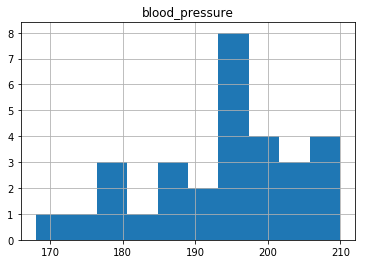

In [117]:
boran_array.hist('blood_pressure')

In [122]:
boran_array.mean()

blood_pressure    193.632568
age                76.419431
planet_id           1.000000
dtype: float64

In [107]:
# radan starta here
X = radan_array[['age']] 
Y = radan_array['blood_pressure']

In [108]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [109]:
model.coef_

array([0.47088464])

In [110]:
model.intercept_

63.825776437935936

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2180a358>]],
      dtype=object)

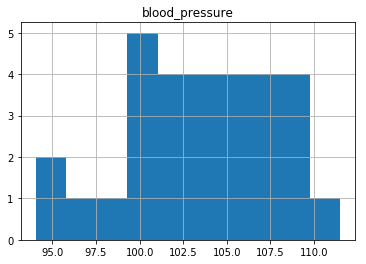

In [126]:
radan_array.hist('blood_pressure')

In [13]:
scatter(X, Y)

NameError: name 'scatter' is not defined

In [124]:
radan_array.mean()

blood_pressure    103.482301
age                84.217069
planet_id           2.000000
dtype: float64

In [6]:
import seaborn as sns


/anaconda3/envs/MSDS5013/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/envs/MSDS5013/lib/python3.6/site-packages/matplotlib/tight_layout.py:177: UserWarning: The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('The left and right margins cannot be made large '
/anaconda3/envs/MSDS5013/lib/python3.6/site-packages/matplotlib/tight_layout.py:182: UserWarning: The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('The bottom and top margins cannot be made large '
/anaconda3/envs/MSDS5013/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.arra

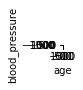

In [12]:
sns.pairplot(boran_array, x_vars = ['age'], y_vars ='blood_pressure', size=0.7, aspect=0.7, kind='reg')

/anaconda3/envs/MSDS5013/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/envs/MSDS5013/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


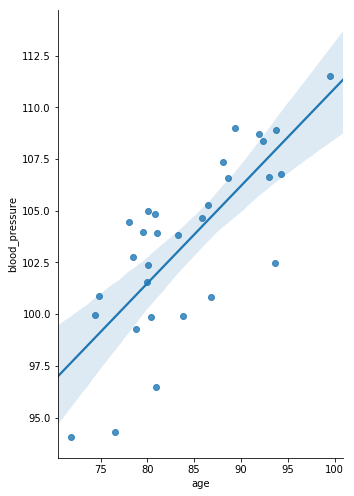

In [10]:
sns.pairplot(radan_array, x_vars = ['age'], y_vars ='blood_pressure', size=7, aspect=0.7, kind='reg')